# flats-in-cracow exploratory data analysis

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from pylab import rcParams
from pathlib import Path

## Setup

In [2]:
# Create directory for images 
Path("img").mkdir(parents=True, exist_ok=True)

# Set default figure size
rcParams['figure.figsize'] = (4, 4)

# Tell pandas how to display floats
pd.options.display.float_format = "{:,.2f}".format

## Data loading

In [3]:
path = '../flats-data/cleaned_data.csv'

In [4]:
data = pd.read_csv(path, lineterminator='\n')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595 entries, 0 to 3594
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   District   3595 non-null   object
 1   Amount     3595 non-null   int64 
 2   Seller     3595 non-null   object
 3   Area       3595 non-null   int64 
 4   Rooms      3595 non-null   int64 
 5   Bathrooms  3595 non-null   int64 
 6   Parking    3595 non-null   object
 7   Garden     3595 non-null   bool  
 8   Balcony    3595 non-null   bool  
 9   Terrace    3595 non-null   bool  
 10  Floor      3595 non-null   bool  
 11  New        3595 non-null   bool  
 12  Estate     3595 non-null   bool  
 13  Townhouse  3595 non-null   bool  
 14  Apartment  3595 non-null   bool  
 15  Land       3595 non-null   bool  
 16  Studio     3595 non-null   bool  
dtypes: bool(10), int64(4), object(3)
memory usage: 231.8+ KB


In [6]:
data.head()

,District,Amount,Seller,Area,Rooms,Bathrooms,Parking,Garden,Balcony,Terrace,Floor,New,Estate,Townhouse,Apartment,Land,Studio
0,podgorze,850000,realtor,71,2,1,no parking,True,False,False,False,False,False,True,False,False,False
1,stare miasto,599104,realtor,65,3,1,garage,True,False,True,False,True,False,False,False,False,False
2,podgorze duchackie,450000,realtor,56,3,1,garage,False,False,True,False,False,False,False,False,False,False
3,krowodrza,339000,realtor,37,2,1,no parking,False,False,False,True,False,False,False,False,False,False
4,czyzyny,440000,realtor,41,2,1,no parking,False,True,False,True,False,True,False,False,False,False


## Numeric features

To visually inspect the data we are going to make histograms for each of the numeric columns.

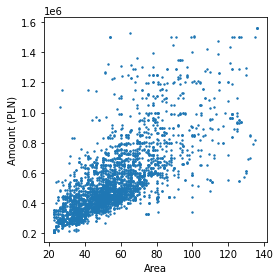

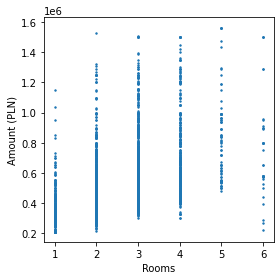

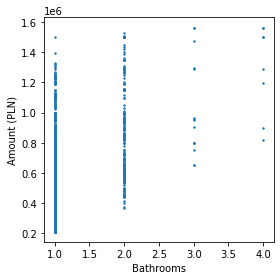

In [7]:
numeric = list(data.select_dtypes('number').columns)    
for col in numeric:
    if col != 'Amount':
        plt.scatter(data[col], data['Amount'], s=2)
        plt.xlabel(f'{col}')
        plt.ylabel(f'Amount (PLN)')
        plt.tight_layout()
        plt.show()

In [8]:
data.select_dtypes('number').corr()

,Amount,Area,Rooms,Bathrooms
Amount,1.00,0.72,0.47,0.45
Area,0.72,1.00,0.76,0.47
Rooms,0.47,0.76,1.00,0.37
Bathrooms,0.45,0.47,0.37,1.00


## Binary features

We are going to group the data and compare averages.

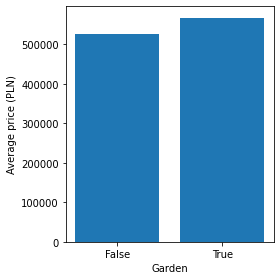

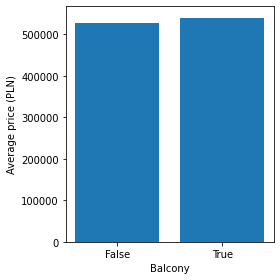

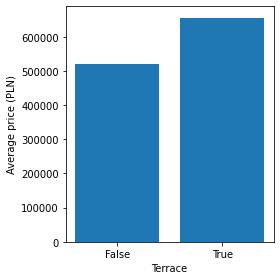

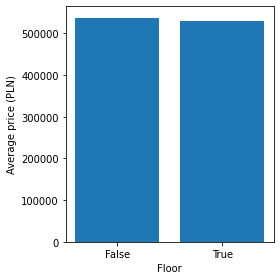

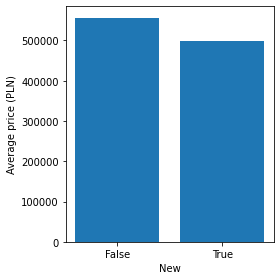

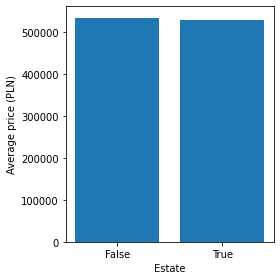

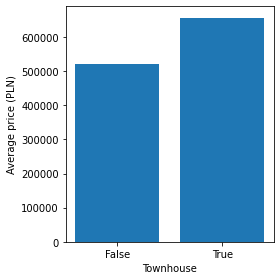

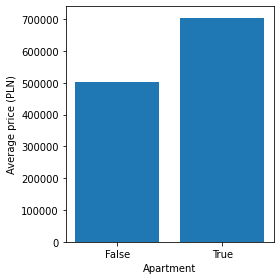

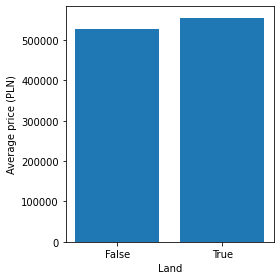

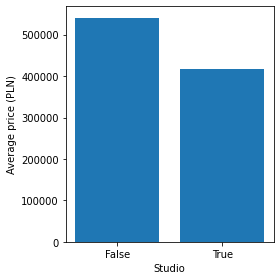

In [9]:
binary = list(data.select_dtypes(bool).columns)    
for col in binary:
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)
    plt.bar(group[col], height=group['Amount'])
    plt.xticks(ticks=group[col].to_list(),
               labels=group[col].to_list())
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()

We check correlation of binary columns with `Amount`.

In [10]:
C = data[binary].corrwith(data['Amount'])
C.name = 'Correlation'
C = C.to_frame()
C = C.sort_values('Correlation', ascending=False)
C = C.reset_index()
C = C.rename(columns={'index': 'Column'})
C

,Column,Correlation
0,Apartment,0.33
1,Townhouse,0.18
2,Terrace,0.18
3,Garden,0.07
4,Land,0.05
5,Balcony,0.03
6,Estate,-0.01
7,Floor,-0.02
8,New,-0.12
9,Studio,-0.13


## Categorical features

Again, we group the rows and compare averages.

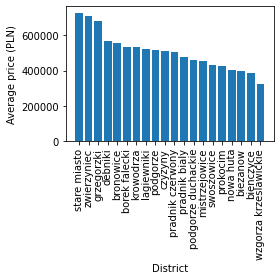

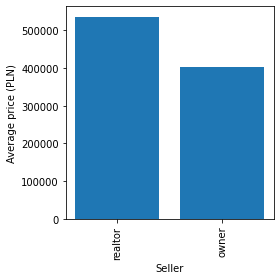

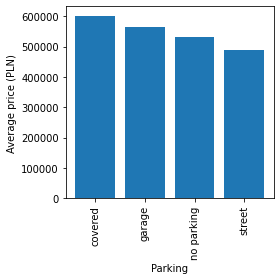

In [11]:
categorical = list(data.select_dtypes('object').columns)    
for col in categorical:
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)

    plt.bar(group[col], group['Amount'])
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()    